In [40]:
import pandas as pd
import numpy as np

In [8]:
old_df = pd.read_excel('2022.xlsx')
old_df['label'] = 0
old_df

,Name,Roberta Base fake,Roberta Base real,Roberta Large fake,Roberta Large real,Entropy,OpenAI Average Probability,OpenAI Class,Count Words,label
0,2022_asp_refphil_MironovaNB_020305_12_A21_502_...,53.726584,46.273416,60.719943,39.280057,4.666008,87.6,unlikely,3803,0
1,2022_asp_refphil_MironovaNB_010319_37_A21_201_...,78.280449,21.719551,58.830452,41.169548,4.667949,87.6,unlikely,4966,0
2,2022_asp_refphil_KhoteevaMS_010302_24_A21_623_...,55.759883,44.240117,68.082541,31.917459,4.642044,79.8,unlikely,4195,0
3,2022_asp_refphil_MartinkusPP_010315_40_A21_111...,97.999591,2.000409,58.638394,41.361606,4.968367,66.3,unlikely,4034,0
4,2022_asp_refphil_KhoteevaMS_010302_11_A21_101_...,46.302229,53.697771,64.191598,35.808402,4.686427,85.9,unlikely,7766,0
...,...,...,...,...,...,...,...,...,...,...
109,2022_asp_refphil_DvurechenskayaTA_020301_75_A2...,97.914618,2.085382,53.181034,46.818966,4.641482,82.2,unlikely,5478,0
110,2022_asp_refphil_MartinkusPP_140601_05_A21_105...,90.207785,9.792215,53.723812,46.276188,4.753590,63.7,unlikely,4326,0
111,2022_asp_refphil_MironovaNB_010319_37_A21_201_...,87.728620,12.271380,50.529742,49.470258,4.750970,87.3,unlikely,5060,0
112,2022_asp_refphil_MartinkusPP_140601_05_A21_105...,84.320819,15.679181,74.360168,25.639832,4.605620,73.9,unlikely,6011,0


In [9]:
new_df = pd.read_excel('2023.xlsx')
new_df = new_df.dropna()

In [14]:
df = pd.concat([old_df, new_df])
df = df.drop(['Name'], axis=1)
df

,Roberta Base fake,Roberta Base real,Roberta Large fake,Roberta Large real,Entropy,OpenAI Average Probability,OpenAI Class,Count Words,label
0,53.726584,46.273416,60.719943,39.280057,4.666008,87.6,unlikely,3803,0.0
1,78.280449,21.719551,58.830452,41.169548,4.667949,87.6,unlikely,4966,0.0
2,55.759883,44.240117,68.082541,31.917459,4.642044,79.8,unlikely,4195,0.0
3,97.999591,2.000409,58.638394,41.361606,4.968367,66.3,unlikely,4034,0.0
4,46.302229,53.697771,64.191598,35.808402,4.686427,85.9,unlikely,7766,0.0
...,...,...,...,...,...,...,...,...,...
205,42.970306,57.029694,56.344974,43.655026,5.135507,68.7,unlikely,5538,1.0
207,38.144779,61.855221,55.578780,44.421220,4.599144,80.6,unlikely,6064,1.0
208,32.670259,67.329741,51.587111,48.412889,4.792588,86.6,unlikely,4880,1.0
209,27.853733,72.146267,75.659066,24.340934,4.777996,69.3,unlikely,5166,1.0


In [15]:
import lightgbm as lgb

In [17]:
cat_col = 'OpenAI Class'

df[cat_col] = df[cat_col].astype('category')

In [18]:
X = df.drop('label', axis=1)
y = df['label']

In [21]:
dataset = lgb.Dataset(X, label=y)

In [64]:
params = {
    'objective': 'binary',
}

from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat), True


evals_result = {}
res = lgb.cv(params, dataset, num_boost_round=100, nfold=7, metrics=['auc', 'f1'], stratified=True,
             feval=[lgb_f1_score], return_cvbooster=True)

print(f"AUC: {max(res['auc-mean']):.6f},\nF1 : {max(res['f1-mean']):.6f}")

[LightGBM] [Info] Number of positive: 51, number of negative: 97
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 8
[LightGBM] [Info] Number of positive: 51, number of negative: 97
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 8
[LightGBM] [Info] Number of positive: 50, number of negative: 98
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.


[LightGBM] [Info] Number of positive: 59, number of negative: 114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 173, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341040 -> initscore=-0.658661
[LightGBM] [Info] Start training from score -0.658661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

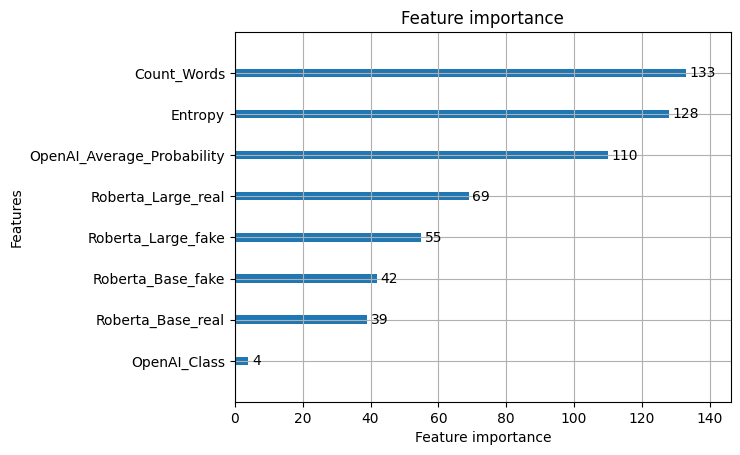

In [57]:
booster = lgb.train(params, dataset, num_boost_round=100)
lgb.plot_importance(booster)